In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from google.colab import files
seed=29

In [ ]:
data = pd.read_csv('/content/cardio_train 2.csv', sep=';')

In [ ]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df_final = data[:2000]

In [ ]:
df_final

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2819,21895,2,167,75.0,130,80,1,1,0,0,1,0
1996,2820,18199,1,157,72.0,110,70,1,1,0,0,1,0
1997,2823,18067,1,156,52.0,150,80,1,1,1,0,0,1
1998,2825,17729,2,168,69.0,120,80,2,1,0,0,0,1


In [ ]:
df_final.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1406.266000,19441.585000,1.36000,164.383000,74.395450,126.878000,93.497000,1.382000,1.237500,0.089500,0.052000,0.79000,0.493000
std,815.649905,2505.794143,0.48012,8.072478,14.896362,24.942518,107.112728,0.694491,0.587594,0.285535,0.222083,0.40741,0.500076
min,0.000000,14307.000000,1.00000,76.000000,41.000000,11.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,717.500000,17557.000000,1.00000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000
50%,1388.000000,19712.000000,1.00000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000
75%,2117.500000,21297.250000,2.00000,170.000000,82.250000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.00000,1.000000
max,2826.000000,23661.000000,2.00000,198.000000,200.000000,902.000000,1200.000000,3.000000,3.000000,1.000000,1.000000,1.00000,1.000000


In [ ]:
df_final.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

**Outliers**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

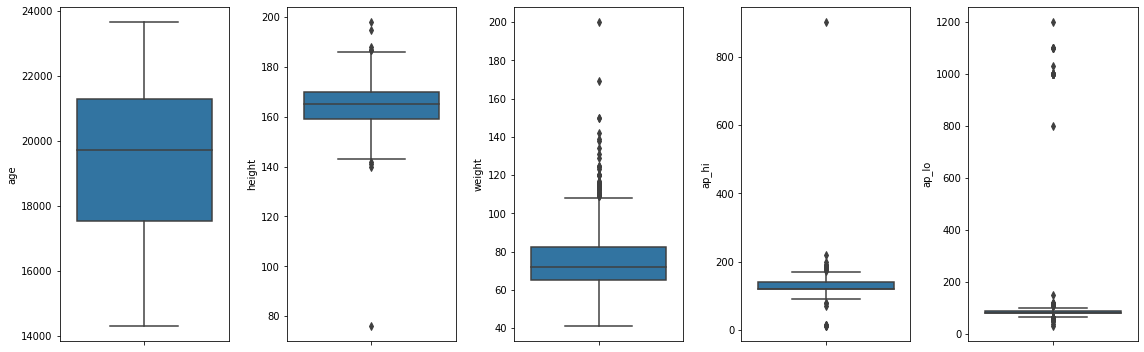

In [ ]:
#Identification of Outliers
from matplotlib import pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 5, figsize=(16, 5))
sns.boxplot(data=df_final, y='age', ax=axes[0])
sns.boxplot(data=df_final, y='height', ax=axes[1])
sns.boxplot(data=df_final, y='weight', ax=axes[2])
sns.boxplot(data=df_final, y='ap_hi', ax=axes[3])
sns.boxplot(data=df_final, y='ap_lo', ax=axes[4])
plt.tight_layout()
plt.savefig("Outliers.png")
files.download("Outliers.png")

**Distribution of attributes**

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.savefig("distribution1.png")
    files.download("distribution1.png")
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

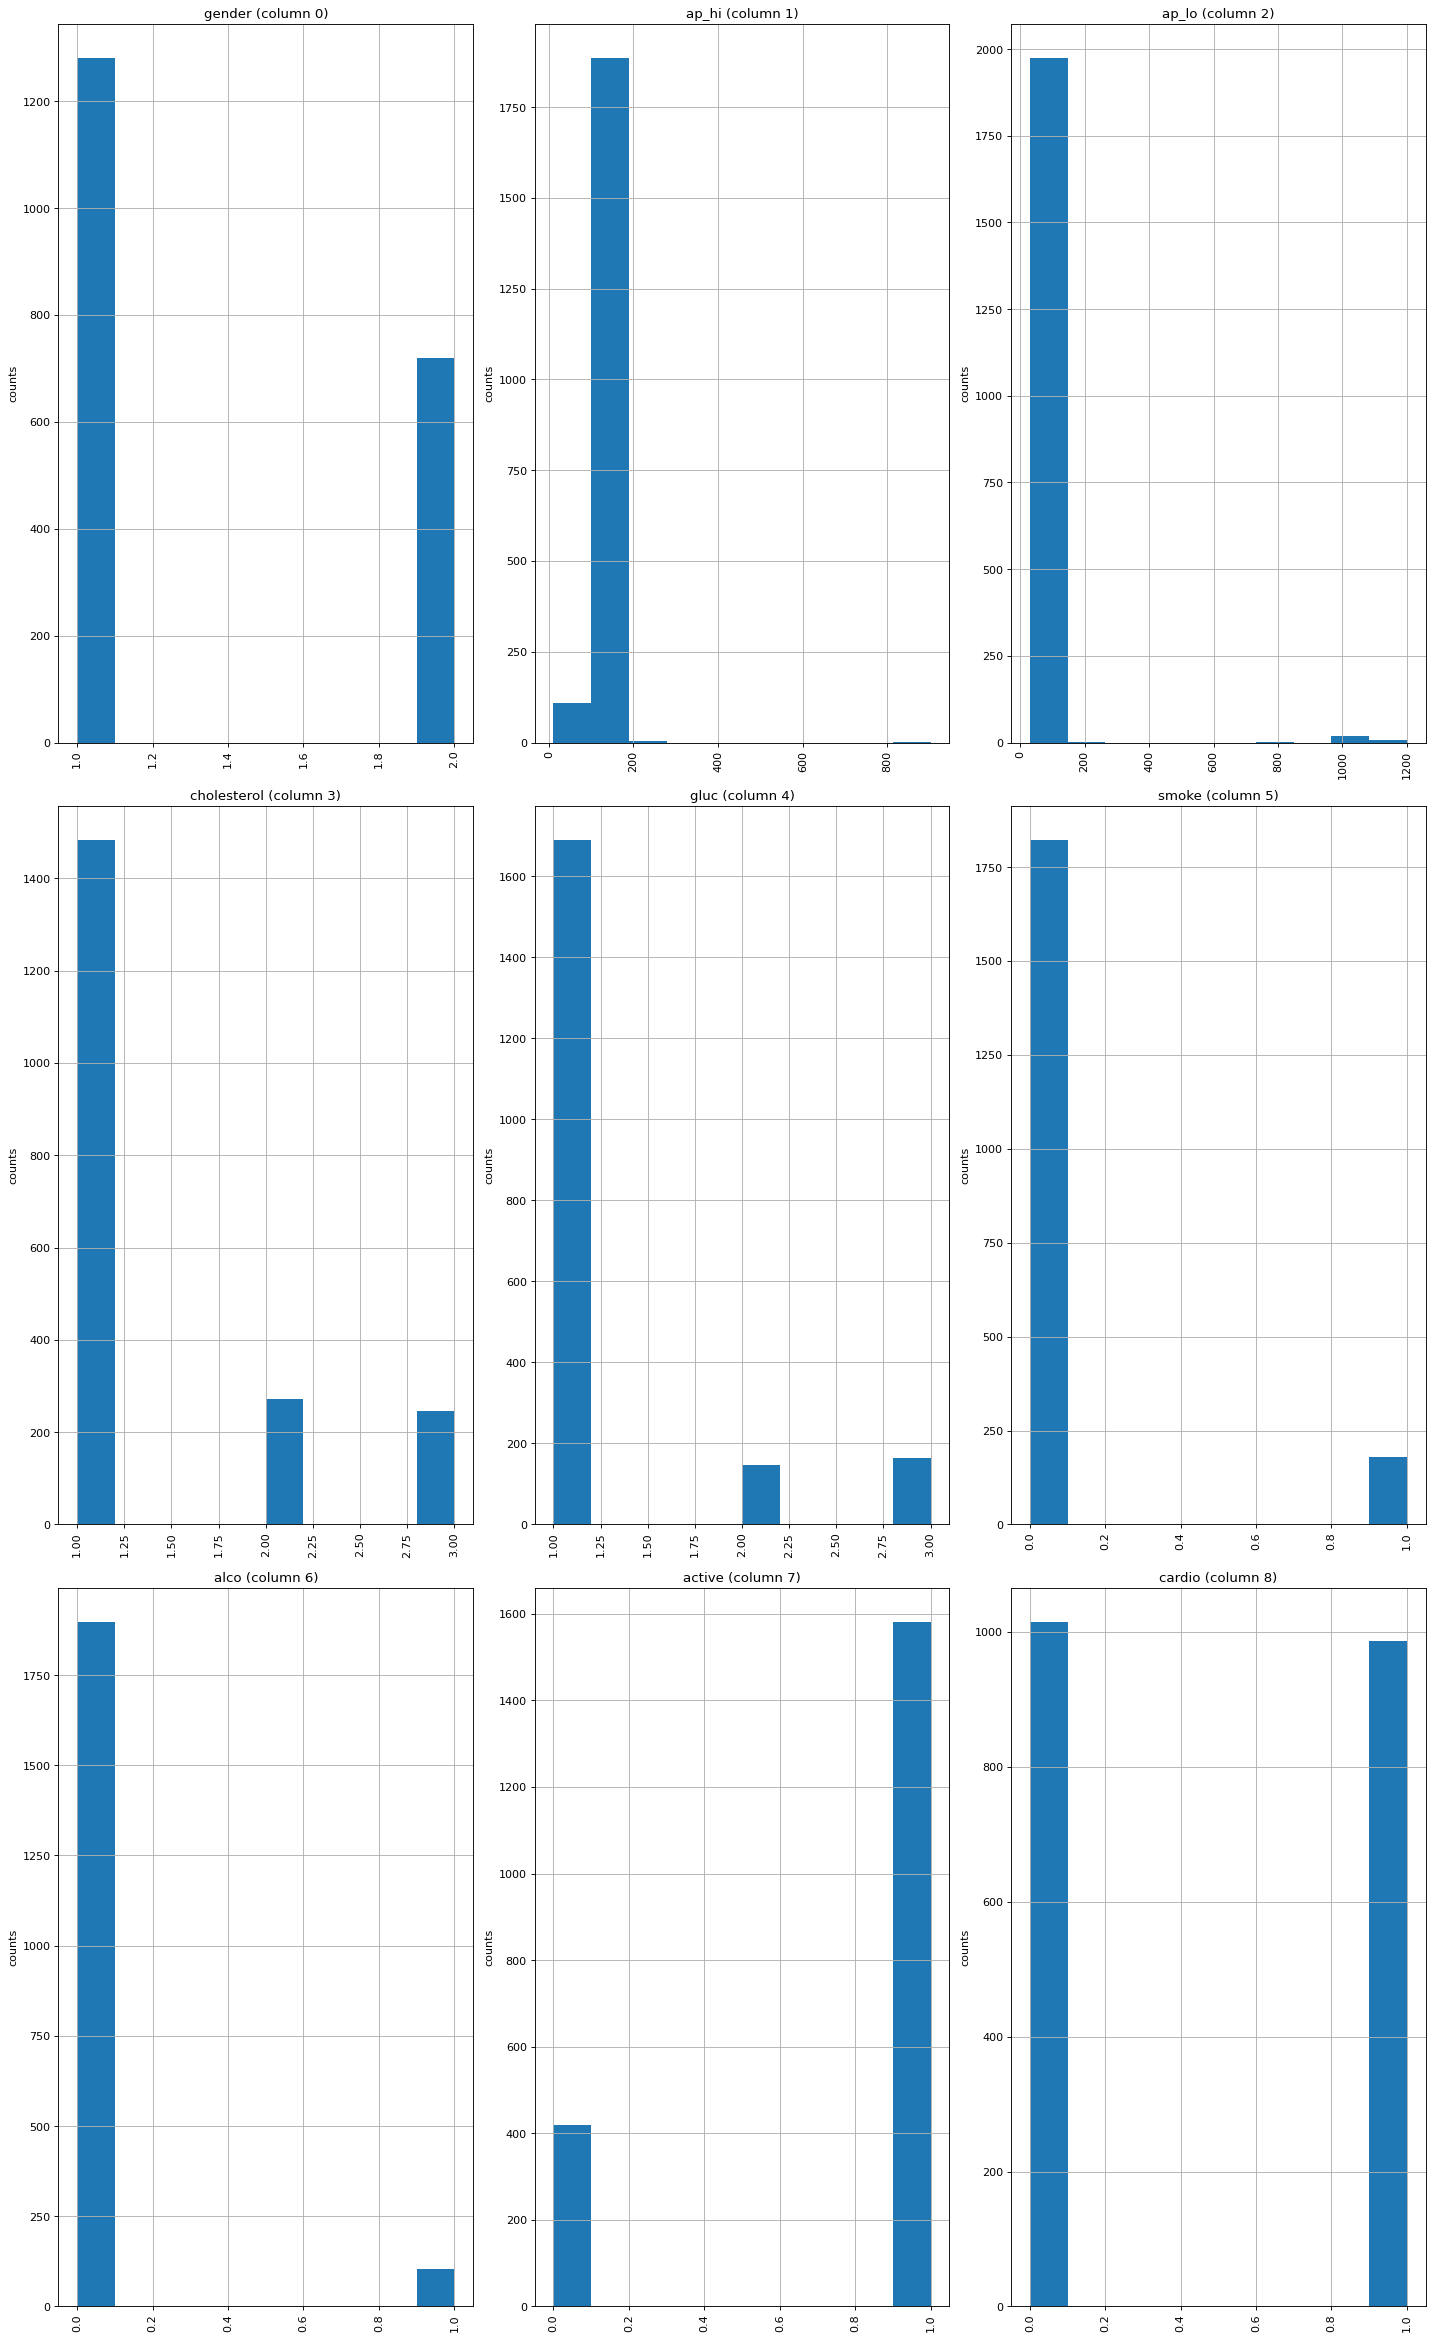

In [ ]:
plotPerColumnDistribution(df_final, 10, 3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

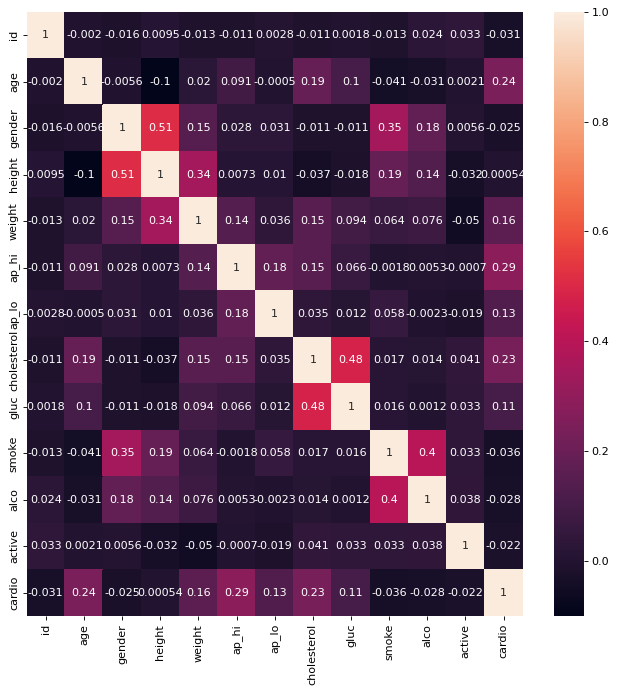

In [ ]:
corrMatrix = df_final.corr()
plt.figure(figsize = (10,10),dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(corrMatrix, annot=True)

plt.savefig("Corr_matrix.png")
files.download("Corr_matrix.png")
plt.show()


**Removing Outliers**

In [ ]:
def remove_outliers(df,fieldname):
  Q1 = df[fieldname].quantile(0.25)
  Q3 = df[fieldname].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  df[fieldname]=np.where(df[fieldname]>upper_whisker,upper_whisker,np.where(df[fieldname]<lower_whisker,lower_whisker,df[fieldname]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


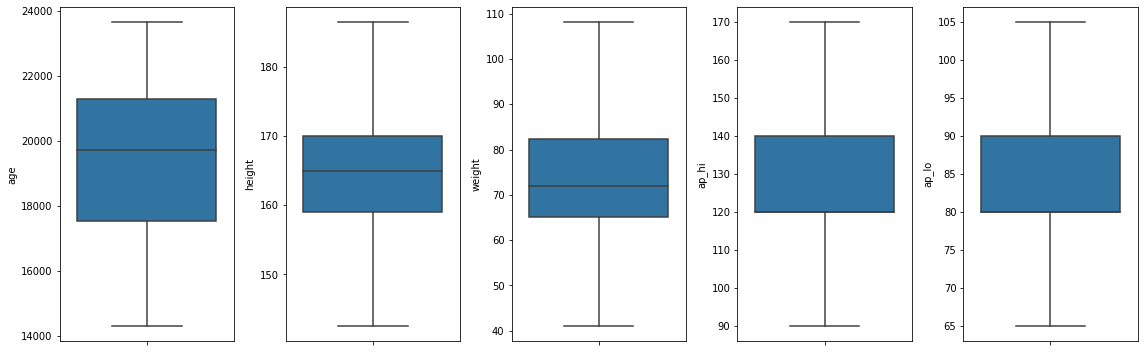

In [ ]:
remove_outliers(df_final,'height')
remove_outliers(df_final,'weight')
remove_outliers(df_final,'ap_hi')
remove_outliers(df_final,'ap_lo')

fig, axes = plt.subplots(1, 5, figsize=(16, 5))
sns.boxplot(data=df_final, y='age', ax=axes[0])
sns.boxplot(data=df_final, y='height', ax=axes[1])
sns.boxplot(data=df_final, y='weight', ax=axes[2])
sns.boxplot(data=df_final, y='ap_hi', ax=axes[3])
sns.boxplot(data=df_final, y='ap_lo', ax=axes[4])
plt.tight_layout()


**ID**
No use of this attribute so removing this


In [ ]:
df_final.drop('id',axis =1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**AGE**



In [ ]:
df_final['age'].describe()

count     2000.000000
mean     19441.585000
std       2505.794143
min      14307.000000
25%      17557.000000
50%      19712.000000
75%      21297.250000
max      23661.000000
Name: age, dtype: float64

In [ ]:
scale= StandardScaler()
df_final['age'] = scale.fit_transform(df_final['age'].values.reshape(-1,1)).reshape(2000,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Height**

In [ ]:
df_final['height'].describe()

count    2000.000000
mean      164.407250
std         7.796901
min       142.500000
25%       159.000000
50%       165.000000
75%       170.000000
max       186.500000
Name: height, dtype: float64

In [ ]:
df_final['height'] = scale.fit_transform(df_final['height'].values.reshape(-1,1)).reshape(2000,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Weight**

In [ ]:
df_final['weight'].describe()

count    2000.000000
mean       74.056575
std        13.689464
min        41.000000
25%        65.000000
50%        72.000000
75%        82.250000
max       108.125000
Name: weight, dtype: float64

In [ ]:
df_final['weight'] = scale.fit_transform(df_final['weight'].values.reshape(-1,1)).reshape(2000,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Ap_hi**

In [ ]:
df_final['ap_hi'].describe()

count    2000.000000
mean      126.583000
std        16.326095
min        90.000000
25%       120.000000
50%       120.000000
75%       140.000000
max       170.000000
Name: ap_hi, dtype: float64

In [ ]:
df_final['ap_hi'] = scale.fit_transform(df_final['ap_hi'].values.reshape(-1,1)).reshape(2000,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Ap_lo**

In [ ]:
df_final['ap_lo'].describe()

count    2000.00000
mean       81.74700
std         8.90891
min        65.00000
25%        80.00000
50%        80.00000
75%        90.00000
max       105.00000
Name: ap_lo, dtype: float64

In [ ]:
df_final['ap_lo'] = scale.fit_transform(df_final['ap_lo'].values.reshape(-1,1)).reshape(2000,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_final

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.418569,2,0.460907,-0.880940,-1.015990,-0.196145,1,1,0,0,1,0
1,0.313917,1,-1.078551,0.799605,0.822019,0.926608,3,1,0,0,1,1
2,-0.233352,1,0.076043,-0.734805,0.209349,-1.318897,3,1,0,0,0,1
3,-0.725933,2,0.589195,0.580403,1.434688,2.049360,1,1,0,0,1,1
4,-0.785411,1,-1.078551,-1.319342,-1.628659,-1.880274,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.979342,2,0.332619,0.068933,0.209349,-0.196145,1,1,0,0,1,0
1996,-0.496009,1,-0.950262,-0.150268,-1.015990,-1.318897,1,1,0,0,1,0
1997,-0.548700,1,-1.078551,-1.611611,1.434688,-0.196145,1,1,1,0,0,1
1998,-0.683621,2,0.460907,-0.369470,-0.403320,-0.196145,2,1,0,0,0,1


In [ ]:
df_final.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,2.000000e+03,2000.00000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,3.650830e-16,1.36000,-5.861422e-16,-6.948886e-16,2.041700e-16,9.464651e-18,1.382000,1.237500,0.089500,0.052000,0.79000,0.493000
std,1.000250e+00,0.48012,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,0.694491,0.587594,0.285535,0.222083,0.40741,0.500076
min,-2.049597e+00,1.00000,-2.810441e+00,-2.415350e+00,-2.241329e+00,-1.880274e+00,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,-7.522790e-01,1.00000,-6.936861e-01,-6.617381e-01,-4.033203e-01,-1.961449e-01,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000
50%,1.079429e-01,1.00000,7.604281e-02,-1.502681e-01,-4.033203e-01,-1.961449e-01,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000
75%,7.407349e-01,2.00000,7.174836e-01,5.986702e-01,8.220187e-01,9.266076e-01,2.000000,1.000000,0.000000,0.000000,1.00000,1.000000
max,1.684285e+00,2.00000,2.834238e+00,2.489283e+00,2.660027e+00,2.610736e+00,3.000000,3.000000,1.000000,1.000000,1.00000,1.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import random
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
seed=29

In [ ]:
recall_l = list()
f1_score_l = list()
accuracy_l = list()
precision_l = list()

In [ ]:
X = df_final.iloc[:,:-1].values
y = df_final.iloc[:,-1].values

**Decision Tree (Hold Out spliting)**

SPLIT TYPE: holdout method
	SPLIT Ratio: 0.2
	Accuracy: 0.6675
	Precision: 0.6985645933014354
	Recall: 0.6759259259259259
	F1 Score:  0.6870588235294117
Confusion matrix : 
 [[146  70]
 [ 63 121]]


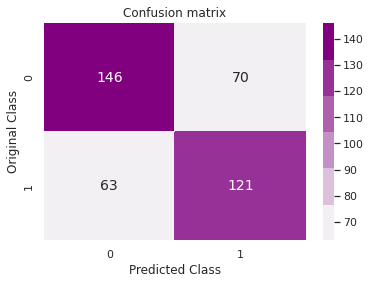

	SPLIT Ratio: 0.25
	Accuracy: 0.636
	Precision: 0.6588235294117647
	Recall: 0.6387832699619772
	F1 Score:  0.6486486486486486
Confusion matrix : 
 [[168  95]
 [ 87 150]]


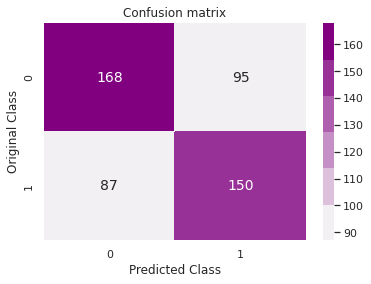

	SPLIT Ratio: 0.33
	Accuracy: 0.6393939393939394
	Precision: 0.6709677419354839
	Recall: 0.6046511627906976
	F1 Score:  0.6360856269113149
Confusion matrix : 
 [[208 136]
 [102 214]]


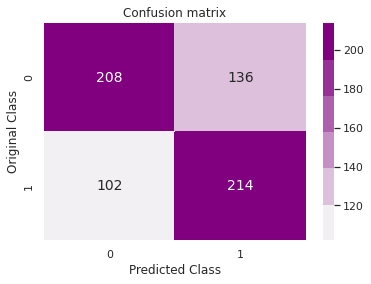

In [ ]:
# Split dataset into training set and test set
print("SPLIT TYPE: holdout method")
l = [0.20,0.25,0.33]
for i in l:
  print("\tSPLIT Ratio:",i)
  X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=i)
  # Create Decision Tree classifer object
  clf = DecisionTreeClassifier()

  # Train Decision Tree Classifer
  clf = clf.fit(X_train,y_train)

  #Predict the response for test dataset
  y_pred = clf.predict(X_test)
  print("\tAccuracy:",metrics.accuracy_score(y_test, y_pred))
  print("\tPrecision:" ,precision_score(y_test, y_pred))
  print('\tRecall:', recall_score(y_test, y_pred))
  print('\tF1 Score: ', f1_score(y_test, y_pred))
  # confusion matrix
  matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
  print('Confusion matrix : \n',matrix)

  plt.figure(figsize=(20,4))

  sns.set(font_scale=1)
  labels = [0,1]
        # representing A in heatmap format
  cmap1=sns.light_palette("purple")

  plt.subplot(1, 3, 1)
  sns.heatmap(matrix, annot=True, cmap=cmap1, fmt="d", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title("Confusion matrix")
  plt.show()

**Navies Bayes (Hold out spliting)**

SPLIT TYPE: holdout method
	SPLIT Ratio: 0.2
	Accuracy: 0.7425
	Precision: 0.798941798941799
	Recall: 0.6990740740740741
	F1 Score:  0.745679012345679
Confusion matrix : 
 [[151  65]
 [ 38 146]]


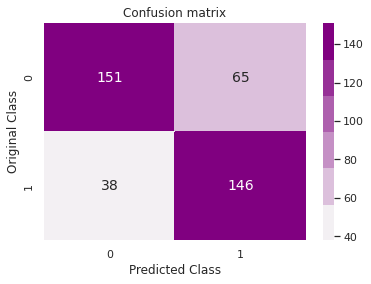

	SPLIT Ratio: 0.25
	Accuracy: 0.724
	Precision: 0.7880184331797235
	Recall: 0.6501901140684411
	F1 Score:  0.7125
Confusion matrix : 
 [[171  92]
 [ 46 191]]


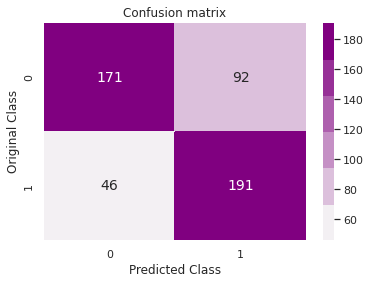

	SPLIT Ratio: 0.33
	Accuracy: 0.7166666666666667
	Precision: 0.775438596491228
	Recall: 0.6424418604651163
	F1 Score:  0.7027027027027027
Confusion matrix : 
 [[221 123]
 [ 64 252]]


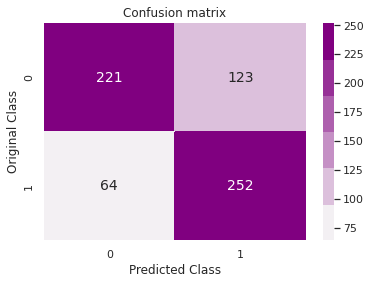

In [ ]:
# Split dataset into training set and test set
print("SPLIT TYPE: holdout method")
l = [0.20,0.25,0.33]
for i in l:
  print("\tSPLIT Ratio:",i)
  X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=i)
  # Create Decision Tree classifer object
  classifier = GaussianNB()

  # Train Decision Tree Classifer
  classifier.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = classifier.predict(X_test)
  print("\tAccuracy:",metrics.accuracy_score(y_test, y_pred))
  print("\tPrecision:" ,precision_score(y_test, y_pred))
  print('\tRecall:', recall_score(y_test, y_pred))
  print('\tF1 Score: ', f1_score(y_test, y_pred))
  # confusion matrix
  matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
  print('Confusion matrix : \n',matrix)

  plt.figure(figsize=(20,4))

  sns.set(font_scale=1)
  labels = [0,1]
        # representing A in heatmap format
  cmap1=sns.light_palette("purple")

  plt.subplot(1, 3, 1)
  sns.heatmap(matrix, annot=True, cmap=cmap1, fmt="d", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title("Confusion matrix")
  plt.show()

**KNN (Hold out Spliting)**

SPLIT TYPE: holdout method
	SPLIT Ratio: 0.2
	Accuracy: 0.7375
	Precision: 0.7936507936507936
	Recall: 0.6944444444444444
	F1 Score:  0.7407407407407406
Confusion matrix : 
 [[150  66]
 [ 39 145]]


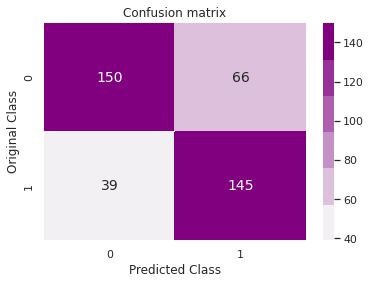

	SPLIT Ratio: 0.25
	Accuracy: 0.724
	Precision: 0.7880184331797235
	Recall: 0.6501901140684411
	F1 Score:  0.7125
Confusion matrix : 
 [[171  92]
 [ 46 191]]


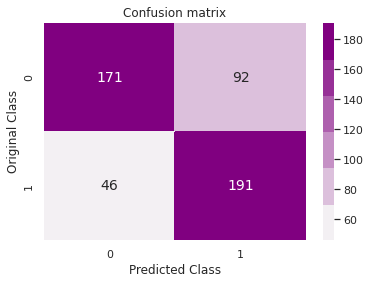

	SPLIT Ratio: 0.33
	Accuracy: 0.7166666666666667
	Precision: 0.775438596491228
	Recall: 0.6424418604651163
	F1 Score:  0.7027027027027027
Confusion matrix : 
 [[221 123]
 [ 64 252]]


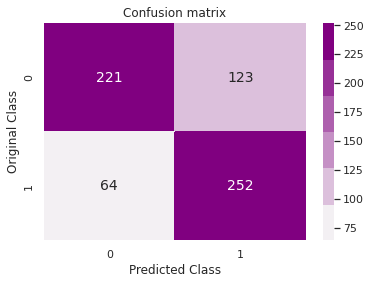

In [ ]:
# Split dataset into training set and test set
print("SPLIT TYPE: holdout method")
l = [0.20,0.25,0.33]
for i in l:
  print("\tSPLIT Ratio:",i)
  X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=i)
  # Create Decision Tree classifer object
  neigh = KNeighborsClassifier(n_neighbors=10)

  # Train Decision Tree Classifer
  neigh.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = classifier.predict(X_test)
  print("\tAccuracy:",metrics.accuracy_score(y_test, y_pred))
  print("\tPrecision:" ,precision_score(y_test, y_pred))
  print('\tRecall:', recall_score(y_test, y_pred))
  print('\tF1 Score: ', f1_score(y_test, y_pred))

  # confusion matrix
  matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
  print('Confusion matrix : \n',matrix)

  plt.figure(figsize=(20,4))

  sns.set(font_scale=1)
  labels = [0,1]
        # representing A in heatmap format
  cmap1=sns.light_palette("purple")

  plt.subplot(1, 3, 1)
  sns.heatmap(matrix, annot=True, cmap=cmap1, fmt="d", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.title("Confusion matrix")
  plt.show()

**KNN (Random Subsampling spliting)**


In [ ]:
recall_l = list()
f1_score_l = list()
accuracy_l = list()
precision_l = list()

def model_eval(X_train,X_test,y_train, y_test,n):
    y_pred = list()
    con_matrix = [[0,0],[0,0]]
    accuracy,f1score,precision,recall = list(),list(),list(),list()
    for i in range(n):
        model = KNeighborsClassifier(n_neighbors=10)
        model.fit(X_train[i],y_train[i])
        y_pred.append(model.predict(X_test[i]))
        accuracy.append(accuracy_score(y_test[i],y_pred[i]))
        f1score.append(f1_score(y_test[i],y_pred[i]))
        precision.append(precision_score(y_test[i],y_pred[i]))
        recall.append(recall_score(y_test[i],y_pred[i]))
        cm = confusion_matrix(y_test[i],y_pred[i])
        con_matrix = [[con_matrix[k][j] + cm[k][j]  for j in range(2)] for k in range(2)]
    accuracy = sum(accuracy)/n
    f1score = sum(f1score)/n
    precision = sum(precision)/n
    recall = sum(recall)/n
    con_matrix = [[round(con_matrix[k][j]/n)  for j in range(2)] for k in range(2)]
    print(f'\taccuracy:{accuracy}\n\tf1_score:{f1score}\n\tprecision{precision}:\n\trecall:{recall}')
    metrics_plot(con_matrix)

def metrics_plot(C):
    plt.figure(figsize=(20,4))

    sns.set(font_scale=1)
    labels = [0,1]
    # representing A in heatmap format
    cmap1=sns.light_palette("green")

    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap1, fmt="d", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.show()

def train_test_split_randomSubsampling(_X,_y, test_size,n):
    X_train,X_test,y_train,y_test = list(),list(),list(),list()
    for _ in range(n):
        random_state = random.randint(0,1000)
        X_traint,X_testt,y_traint,y_testt = train_test_split(_X,_y,random_state=random_state,test_size=test_size)
        X_train.append(X_traint)
        X_test.append(X_testt)
        y_train.append(y_traint)
        y_test.append(y_testt)
    model_eval(X_train,X_test,y_train, y_test,n)

SPLIT TYPE: Random Subsampling method
	SPLIT Ratio: 0.2
	accuracy:0.7064999999999999
	f1_score:0.6758298252578129
	precision0.7284848203695714:
	recall:0.6315250859344524


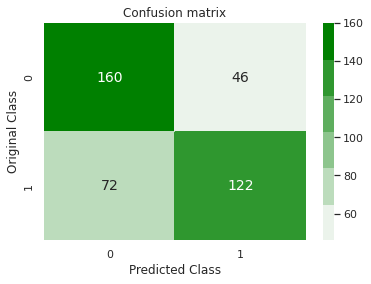

	SPLIT Ratio: 0.25
	accuracy:0.712
	f1_score:0.6757940267580236
	precision0.7248490533183883:
	recall:0.6331926109259529


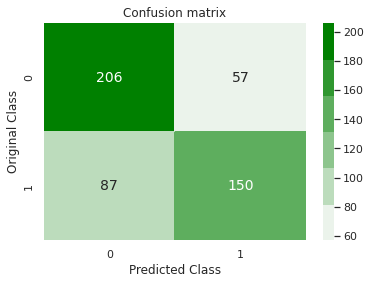

	SPLIT Ratio: 0.33
	accuracy:0.7045454545454546
	f1_score:0.6708240531019926
	precision0.7396194155969743:
	recall:0.6137798291767179


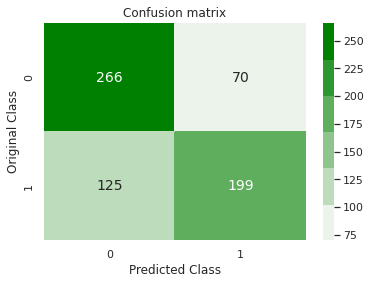

In [ ]:
# Split dataset into training set and test set
print("SPLIT TYPE: Random Subsampling method")
sample = [0.20,0.25,0.33]
for i in sample:
  print("\tSPLIT Ratio:",i)
  train_test_split_randomSubsampling(X,y,i,round(1/i))

**Desicion Tree (Random Subsampling spliting)**

In [ ]:
recall_l = list()
f1_score_l = list()
accuracy_l = list()
precision_l = list()

def model_eval(X_train,X_test,y_train, y_test,n):
    y_pred = list()
    con_matrix = [[0,0],[0,0]]
    accuracy,f1score,precision,recall = list(),list(),list(),list()
    for i in range(n):
        model = DecisionTreeClassifier()
        model.fit(X_train[i],y_train[i])
        y_pred.append(model.predict(X_test[i]))
        accuracy.append(accuracy_score(y_test[i],y_pred[i]))
        f1score.append(f1_score(y_test[i],y_pred[i]))
        precision.append(precision_score(y_test[i],y_pred[i]))
        recall.append(recall_score(y_test[i],y_pred[i]))
        cm = confusion_matrix(y_test[i],y_pred[i])
        con_matrix = [[con_matrix[k][j] + cm[k][j]  for j in range(2)] for k in range(2)]
    accuracy = sum(accuracy)/n
    f1score = sum(f1score)/n
    precision = sum(precision)/n
    recall = sum(recall)/n
    con_matrix = [[round(con_matrix[k][j]/n)  for j in range(2)] for k in range(2)]
    print(f'\taccuracy:{accuracy}\n\tf1_score:{f1score}\n\tprecision{precision}:\n\trecall:{recall}')
    metrics_plot(con_matrix)

def metrics_plot(C):
    plt.figure(figsize=(20,4))

    sns.set(font_scale=1)
    labels = [0,1]
    # representing A in heatmap format
    cmap1=sns.light_palette("green")

    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap1, fmt="d", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.show()

def train_test_split_randomSubsampling(_X,_y, test_size,n):
    X_train,X_test,y_train,y_test = list(),list(),list(),list()
    for _ in range(n):
        random_state = random.randint(0,1000)
        X_traint,X_testt,y_traint,y_testt = train_test_split(_X,_y,random_state=random_state,test_size=test_size)
        X_train.append(X_traint)
        X_test.append(X_testt)
        y_train.append(y_traint)
        y_test.append(y_testt)
    model_eval(X_train,X_test,y_train, y_test,n)

SPLIT TYPE: Random Subsampling method
	SPLIT Ratio: 0.2
	accuracy:0.6449999999999999
	f1_score:0.6393876351555259
	precision0.6377695522569257:
	recall:0.6417345016388898


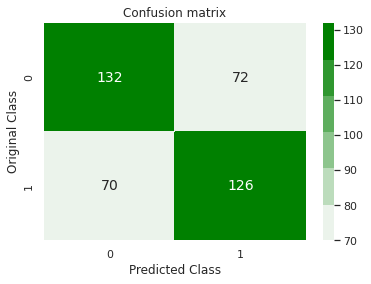

	SPLIT Ratio: 0.25
	accuracy:0.6325000000000001
	f1_score:0.62752905736401
	precision0.6430132381634399:
	recall:0.6130850829481095


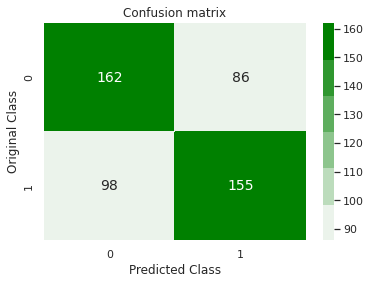

	SPLIT Ratio: 0.33
	accuracy:0.6378787878787879
	f1_score:0.6317797148902783
	precision0.6374128592615822:
	recall:0.6265146880614029


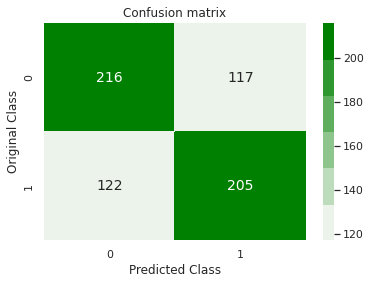

In [ ]:
# Split dataset into training set and test set
print("SPLIT TYPE: Random Subsampling method")
sample = [0.20,0.25,0.33]
for i in sample:
  print("\tSPLIT Ratio:",i)
  train_test_split_randomSubsampling(X,y,i,round(1/i))

**Navies Bayes (Random Subsampling spliting)**

In [ ]:
recall_l = list()
f1_score_l = list()
accuracy_l = list()
precision_l = list()

def model_eval(X_train,X_test,y_train, y_test,n):
    y_pred = list()
    con_matrix = [[0,0],[0,0]]
    accuracy,f1score,precision,recall = list(),list(),list(),list()
    for i in range(n):
        model = GaussianNB()
        model.fit(X_train[i],y_train[i])
        y_pred.append(model.predict(X_test[i]))
        accuracy.append(accuracy_score(y_test[i],y_pred[i]))
        f1score.append(f1_score(y_test[i],y_pred[i]))
        precision.append(precision_score(y_test[i],y_pred[i]))
        recall.append(recall_score(y_test[i],y_pred[i]))
        cm = confusion_matrix(y_test[i],y_pred[i])
        con_matrix = [[con_matrix[k][j] + cm[k][j]  for j in range(2)] for k in range(2)]
    accuracy = sum(accuracy)/n
    f1score = sum(f1score)/n
    precision = sum(precision)/n
    recall = sum(recall)/n
    con_matrix = [[round(con_matrix[k][j]/n)  for j in range(2)] for k in range(2)]
    print(f'\taccuracy:{accuracy}\n\tf1_score:{f1score}\n\tprecision{precision}:\n\trecall:{recall}')
    metrics_plot(con_matrix)

def metrics_plot(C):
    plt.figure(figsize=(20,4))

    sns.set(font_scale=1)
    labels = [0,1]
    # representing A in heatmap format
    cmap1=sns.light_palette("green")

    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap1, fmt="d", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.show()

def train_test_split_randomSubsampling(_X,_y, test_size,n):
    X_train,X_test,y_train,y_test = list(),list(),list(),list()
    for _ in range(n):
        random_state = random.randint(0,1000)
        X_traint,X_testt,y_traint,y_testt = train_test_split(_X,_y,random_state=random_state,test_size=test_size)
        X_train.append(X_traint)
        X_test.append(X_testt)
        y_train.append(y_traint)
        y_test.append(y_testt)
    model_eval(X_train,X_test,y_train, y_test,n)

SPLIT TYPE: Random Subsampling method
	SPLIT Ratio: 0.2
	accuracy:0.696
	f1_score:0.6532946597128779
	precision0.7508419244128566:
	recall:0.5790813617147453


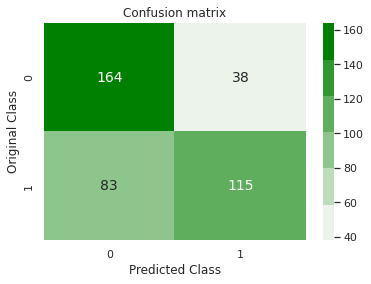

	SPLIT Ratio: 0.25
	accuracy:0.7204999999999999
	f1_score:0.6887159593297794
	precision0.774451253144187:
	recall:0.6201180179110013


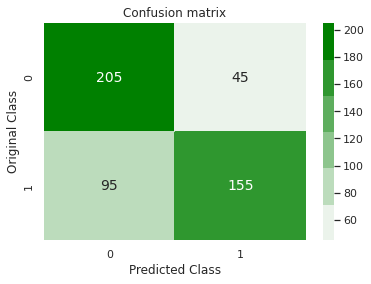

	SPLIT Ratio: 0.33
	accuracy:0.7196969696969697
	f1_score:0.6798393109693749
	precision0.7597112788667627:
	recall:0.6152791607109603


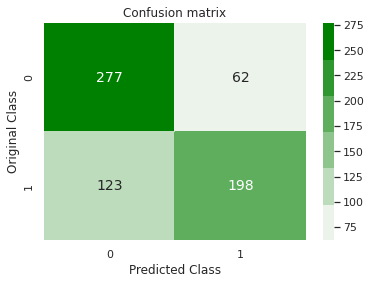

In [ ]:
# Split dataset into training set and test set
print("SPLIT TYPE: Random Subsampling method")
sample = [0.20,0.25,0.33]
for i in sample:
  print("\tSPLIT Ratio:",i)
  train_test_split_randomSubsampling(X,y,i,round(1/i))

**Desicion Tree (Cross Validation spliting)**

In [ ]:
recall_l = list()
f1_score_l = list()
accuracy_l = list()
precision_l = list()

def model_eval(X_train,X_test,y_train, y_test,n):
    y_pred = list()
    con_matrix = [[0,0],[0,0]]
    accuracy,f1score,precision,recall = list(),list(),list(),list()
    for i in range(n):
        model = DecisionTreeClassifier()
        model.fit(X_train[i],y_train[i])
        y_pred.append(model.predict(X_test[i]))
        accuracy.append(accuracy_score(y_test[i],y_pred[i]))
        f1score.append(f1_score(y_test[i],y_pred[i]))
        precision.append(precision_score(y_test[i],y_pred[i]))
        recall.append(recall_score(y_test[i],y_pred[i]))
        cm = confusion_matrix(y_test[i],y_pred[i])
        con_matrix = [[con_matrix[k][j] + cm[k][j]  for j in range(2)] for k in range(2)]
    accuracy = sum(accuracy)/n
    f1score = sum(f1score)/n
    precision = sum(precision)/n
    recall = sum(recall)/n
    con_matrix = [[round(con_matrix[k][j]/n)  for j in range(2)] for k in range(2)]
    print(f'\taccuracy:{accuracy}\n\tf1_score:{f1score}\n\tprecision{precision}:\n\trecall:{recall}')
    metrics_plot(con_matrix)

def metrics_plot(C):
    plt.figure(figsize=(20,4))

    sns.set(font_scale=1)
    labels = [0,1]
    # representing A in heatmap format
    cmap1=sns.light_palette("Blue")

    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap1, fmt="d", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.show()

def train_test_split_crossValidation(_X,_y,k):
    X_train,X_test,y_train,y_test = list(),list(),list(),list()
    kf = StratifiedKFold(n_splits = k, shuffle = True)
    for train_index, test_index in kf.split(X,y):
        X_train.append(X[train_index])
        X_test.append(X[test_index])
        y_train.append(y[train_index])
        y_test.append(y[test_index])
    n=k    
    model_eval(X_train,X_test,y_train, y_test,n)

SPLIT TYPE: Cross Validation method
	SPLIT Ratio: 0.2
	accuracy:0.642
	f1_score:0.6343032341276591
	precision0.6391169775628679:
	recall:0.6298261805876019


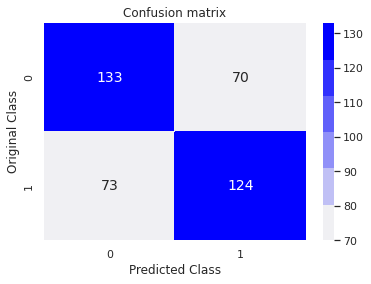

	SPLIT Ratio: 0.25
	accuracy:0.639
	f1_score:0.6335042892570619
	precision0.6352230134488364:
	recall:0.6328338435206214


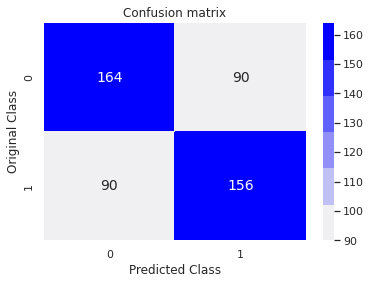

	SPLIT Ratio: 0.33
	accuracy:0.6380008194101148
	f1_score:0.6299997960522922
	precision0.6348609150031316:
	recall:0.6257907677860973


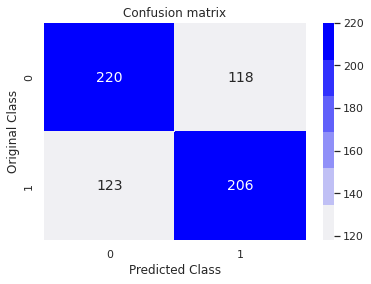

In [ ]:
# Split dataset into training set and test set
print("SPLIT TYPE: Cross Validation method")
sample = [0.20,0.25,0.33]
for i in sample:
  print("\tSPLIT Ratio:",i)
  train_test_split_crossValidation(X,y,round(1/i))

In [ ]:
recall_l = list()
f1_score_l = list()
accuracy_l = list()
precision_l = list()

def model_eval(X_train,X_test,y_train, y_test,n):
    y_pred = list()
    con_matrix = [[0,0],[0,0]]
    accuracy,f1score,precision,recall = list(),list(),list(),list()
    for i in range(n):
        model = KNeighborsClassifier(n_neighbors=10)
        model.fit(X_train[i],y_train[i])
        y_pred.append(model.predict(X_test[i]))
        accuracy.append(accuracy_score(y_test[i],y_pred[i]))
        f1score.append(f1_score(y_test[i],y_pred[i]))
        precision.append(precision_score(y_test[i],y_pred[i]))
        recall.append(recall_score(y_test[i],y_pred[i]))
        cm = confusion_matrix(y_test[i],y_pred[i])
        con_matrix = [[con_matrix[k][j] + cm[k][j]  for j in range(2)] for k in range(2)]
    accuracy = sum(accuracy)/n
    f1score = sum(f1score)/n
    precision = sum(precision)/n
    recall = sum(recall)/n
    con_matrix = [[round(con_matrix[k][j]/n)  for j in range(2)] for k in range(2)]
    print(f'\taccuracy:{accuracy}\n\tf1_score:{f1score}\n\tprecision{precision}:\n\trecall:{recall}')
    metrics_plot(con_matrix)

def metrics_plot(C):
    plt.figure(figsize=(20,4))

    sns.set(font_scale=1)
    labels = [0,1]
    # representing A in heatmap format
    cmap1=sns.light_palette("Blue")

    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap1, fmt="d", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.show()

def train_test_split_crossValidation(_X,_y,k):
    X_train,X_test,y_train,y_test = list(),list(),list(),list()
    kf = StratifiedKFold(n_splits = k, shuffle = True)
    for train_index, test_index in kf.split(X,y):
        X_train.append(X[train_index])
        X_test.append(X[test_index])
        y_train.append(y[train_index])
        y_test.append(y[test_index])
    n=k    
    model_eval(X_train,X_test,y_train, y_test,n)

SPLIT TYPE: Cross Validation method
	SPLIT Ratio: 0.2
	accuracy:0.7095
	f1_score:0.6768305498590099
	precision0.7490965368888116:
	recall:0.6176742039686202


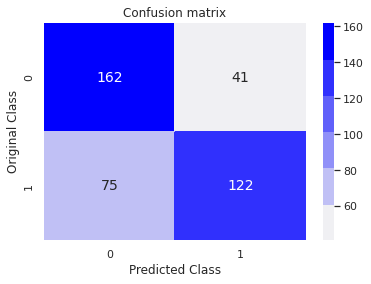

	SPLIT Ratio: 0.25
	accuracy:0.7094999999999999
	f1_score:0.6788881930375066
	precision0.744456459990708:
	recall:0.6247078766334222


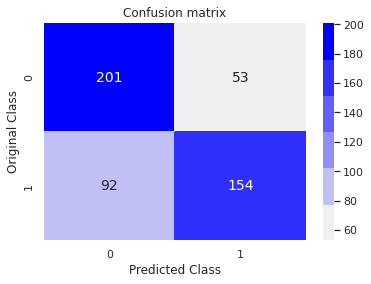

	SPLIT Ratio: 0.33
	accuracy:0.7205113659386523
	f1_score:0.6900709538243763
	precision0.7603745052681283:
	recall:0.6318852398250426


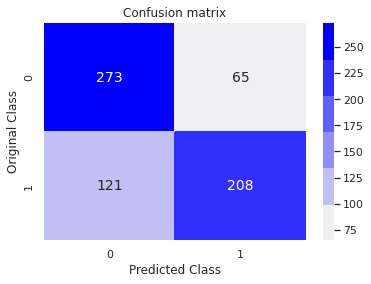

In [ ]:
# Split dataset into training set and test set
print("SPLIT TYPE: Cross Validation method")
sample = [0.20,0.25,0.33]
for i in sample:
  print("\tSPLIT Ratio:",i)
  train_test_split_crossValidation(X,y,round(1/i))

In [ ]:
recall_l = list()
f1_score_l = list()
accuracy_l = list()
precision_l = list()

def model_eval(X_train,X_test,y_train, y_test,n):
    y_pred = list()
    con_matrix = [[0,0],[0,0]]
    accuracy,f1score,precision,recall = list(),list(),list(),list()
    for i in range(n):
        model = GaussianNB()
        model.fit(X_train[i],y_train[i])
        y_pred.append(model.predict(X_test[i]))
        accuracy.append(accuracy_score(y_test[i],y_pred[i]))
        f1score.append(f1_score(y_test[i],y_pred[i]))
        precision.append(precision_score(y_test[i],y_pred[i]))
        recall.append(recall_score(y_test[i],y_pred[i]))
        cm = confusion_matrix(y_test[i],y_pred[i])
        con_matrix = [[con_matrix[k][j] + cm[k][j]  for j in range(2)] for k in range(2)]
    accuracy = sum(accuracy)/n
    f1score = sum(f1score)/n
    precision = sum(precision)/n
    recall = sum(recall)/n
    con_matrix = [[round(con_matrix[k][j]/n)  for j in range(2)] for k in range(2)]
    print(f'\taccuracy:{accuracy}\n\tf1_score:{f1score}\n\tprecision{precision}:\n\trecall:{recall}')
    metrics_plot(con_matrix)

def metrics_plot(C):
    plt.figure(figsize=(20,4))

    sns.set(font_scale=1)
    labels = [0,1]
    # representing A in heatmap format
    cmap1=sns.light_palette("Blue")

    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap1, fmt="d", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.show()

def train_test_split_crossValidation(_X,_y,k):
    X_train,X_test,y_train,y_test = list(),list(),list(),list()
    kf = StratifiedKFold(n_splits = k, shuffle = True)
    for train_index, test_index in kf.split(X,y):
        X_train.append(X[train_index])
        X_test.append(X[test_index])
        y_train.append(y[train_index])
        y_test.append(y[test_index])
    n=k    
    model_eval(X_train,X_test,y_train, y_test,n)

SPLIT TYPE: Cross Validation method
	SPLIT Ratio: 0.2
	accuracy:0.7150000000000001
	f1_score:0.6775944424332582
	precision0.7648660655703851:
	recall:0.609531866892273


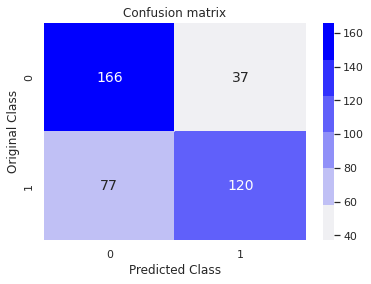

	SPLIT Ratio: 0.25
	accuracy:0.7165
	f1_score:0.6806670073400092
	precision0.7648019886272044:
	recall:0.6136565616668312


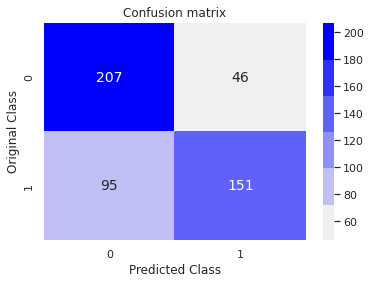

	SPLIT Ratio: 0.33
	accuracy:0.7145001073037055
	f1_score:0.6774258867426569
	precision0.7641120960823562:
	recall:0.6085174339585341


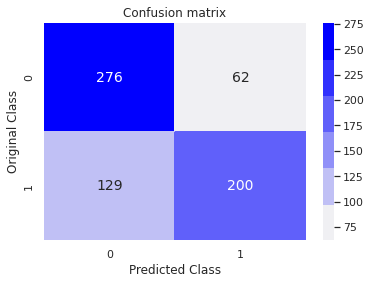

In [ ]:
# Split dataset into training set and test set
print("SPLIT TYPE: Cross Validation method")
sample = [0.20,0.25,0.33]
for i in sample:
  print("\tSPLIT Ratio:",i)
  train_test_split_crossValidation(X,y,round(1/i))